In [50]:
import pandas as pd
import matplotlib.pyplot as plt

genes_of_interest = ['b3255', 'b1288', 'b0185', 'b3256', 'b2316']

# load in a bunch of potentially useful files
# loading merged log_tpm_file
# merge together log_tpm_df files
log_tpm_df = pd.read_csv('../data/precise_1.0/log_tpm.csv', index_col = 0)
starve_log_tpm = pd.read_csv('../data/validation_data_sets/stationary_phase/cleaned_log_tpm_qc.csv', index_col = 0)
to_blank_inds = list(set(log_tpm_df.index) - set(starve_log_tpm.index))
# need to create zero rows for missing values
zeros_data = {col : 0 for col in starve_log_tpm.columns}
zeros_df = pd.DataFrame(zeros_data, index = to_blank_inds)
starve_log_tpm = pd.concat([starve_log_tpm, zeros_df])
starve_log_tpm = starve_log_tpm.loc[log_tpm_df.index]
log_tpm_df = pd.concat([starve_log_tpm, log_tpm_df], axis = 1)

iM_to_genes = {}
k_to_iM = {}
f = open('../data/precise_1.0/iM_table.csv', 'r')
lines = f.readlines()
f.close()
k_to_iM = {line.split(',')[0] : line.split(',')[1] for line in lines[1:]}
f = open('../data/precise_1.0/gene_presence_list.csv', 'r')
lines = f.readlines()
f.close()
for line in lines[1:]:
    k = line.split(',')[1]
    iM = k_to_iM[k]
    gene = line.split(',')[2].replace('\n', '')
    if iM not in iM_to_genes:
        iM_to_genes.update({iM : []})
    iM_to_genes[iM].append(gene)

A = pd.read_csv('../data/precise_1.0/A.csv', index_col = 0).rename(index = {int(k) : v for k, v in k_to_iM.items()})
all_A = pd.read_csv('../data/validation_data_sets/merged_A.csv', index_col = 0)

Text(0, 0.5, 'TPM Expression')

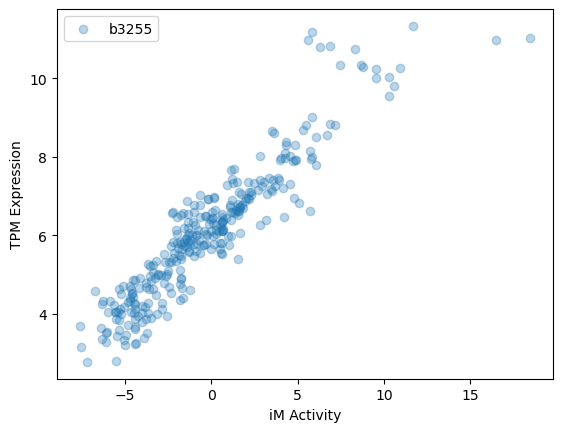

In [52]:
tpm_df = log_tpm_df
plt.figure()
for gene in genes_of_interest[0:1]:
    plt.scatter(all_A.loc['FadR/IclR'], tpm_df.loc['b0221'], alpha = 0.3, label = gene)
plt.legend()
plt.xlabel('iM Activity')
plt.ylabel('TPM Expression')

In [21]:
all_A

['b0221',
 'b0443',
 'b0557',
 'b0954',
 'b1187',
 'b1949',
 'b2341',
 'b2342',
 'b3081',
 'b3845',
 'b3846',
 'b3963',
 'b4015']